# Time Series - Final Project
## Evaluating Temp Data
### Load the data and look at it

In [14]:
D <- read.csv("https://nmimoto.github.io/datasets/Temp.csv")
D

Date,Temp
<fct>,<dbl>
1/1/1981,38.1
1/2/1981,32.4
1/3/1981,34.5
1/4/1981,20.7
1/5/1981,21.5
1/6/1981,23.1
1/7/1981,29.7
1/8/1981,36.6
1/9/1981,36.1


### Convert it to a time series and plot it

In [15]:
D1 <- ts(D["Temp"], start=c(1981,1), freq=365)

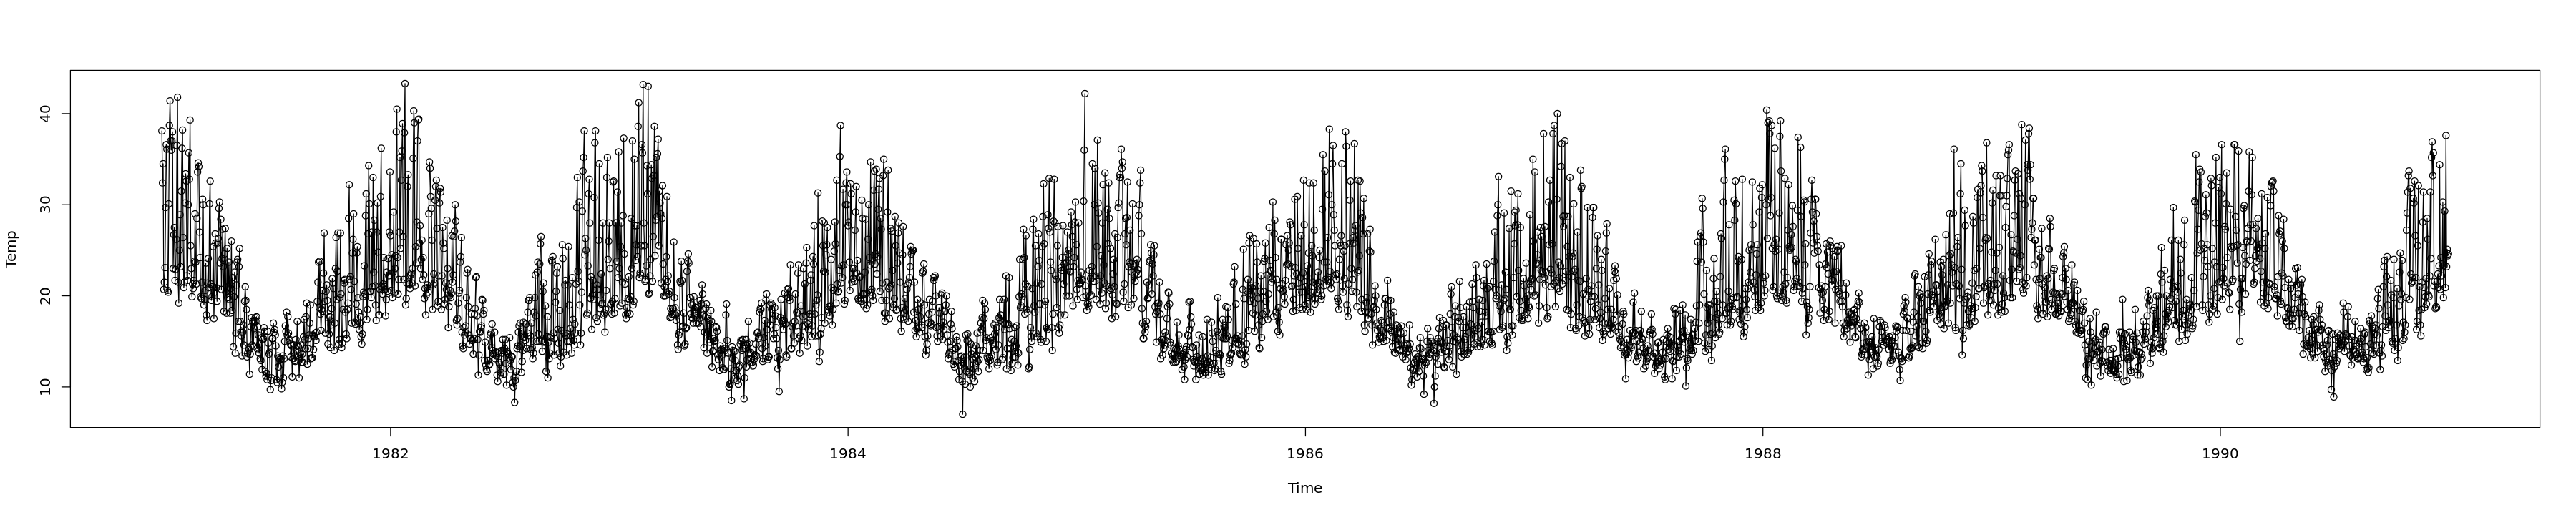

In [12]:
options(repr.plot.width=30, repr.plot.height=6)
plot(D1, type='o')